# Project Part 2

By Daniel Jorge Deutsch and Kevin Kuhl

<br>

## About the dataset

*212 records*

| Index &nbsp; | Name &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   |
|--------------|:--------------------------------------------------------|
| 0            | `DATE`                                                  |
| 1            | `FFR`                                                   |
| 2            | `Tbill`                                                 |
| 3            | `Tb1yr`                                                 |
| 4            | `r5`                                                    |
| 5            | `r10`                                                   |
| 6            | `PPINSA`                                                |
| 7            | `Finished`                                              |
| 8            | `CPI`                                                   |
| 9            | `CPICORE`                                               |
| 10           | `M1NSA`                                                 |
| 11           | `M2SA`                                                  |
| 12           | `M2NSA`                                                 |
| 13           | `Unemp`                                                 |
| 14           | `IndProd`                                               |
| 15           | `RGDP`                                                  |
| 16           | `Potent`                                                |
| 17           | `Deflator`                                              |
| 18           | `Curr`                                                  |


In [1]:
import warnings
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy.stats import f 
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")

In [2]:
FIGSIZE = (15, 4)

# Exercise 1

In [3]:
df = pd.read_excel("./quarterly.xls", parse_dates=["DATE"])

In [4]:
df.isna().sum()

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

Therefore, we can conclude that there are no missing values in the dataset

In [5]:
df

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960-10-01,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961-01-01,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011-10-01,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012-01-01,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012-04-01,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012-07-01,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


# Exercise 2

The CPI (Consumer Price Index) relates to the inflaction by the following:

<br>

\begin{aligned}
    inf(t) = \frac{CPI(t) - CPI(t-1)}{CPI(t)}
\end{aligned}

In [6]:
# Obtains the inflaction
inf = 100*df["CPI"].pct_change().dropna().to_numpy()

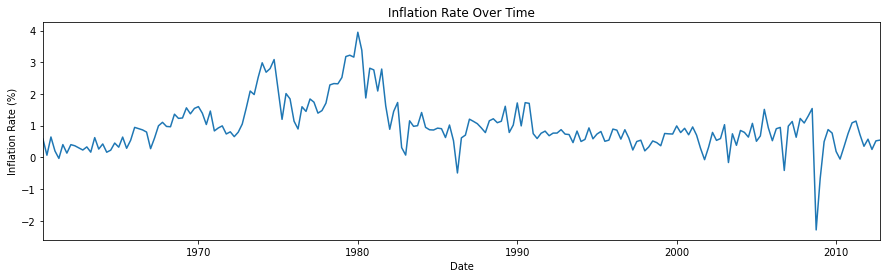

In [7]:
# Plots the inflaction
plt.figure(figsize=FIGSIZE)
plt.title("Inflation Rate Over Time")
plt.plot(df["DATE"][1:], inf)
plt.xlim(np.min(df["DATE"][1:]), np.max(df["DATE"]))
plt.ylabel("Inflation Rate (%)")
plt.xlabel("Date")
plt.show()

We can observe that the inflation is stable at a low value between 1960 and 1973. After that we can clearly see the effects of the oil shocks in 1974 and 1979, in which the inflation raised to its maximum values (close to 3% and 4%, respectively). Then, the inflation returns to its stable status between 1990 and 2007. In 2008 its clear that the Subprime Crises resulted in a deflation, hitting almost -2%.

# Exercise 3

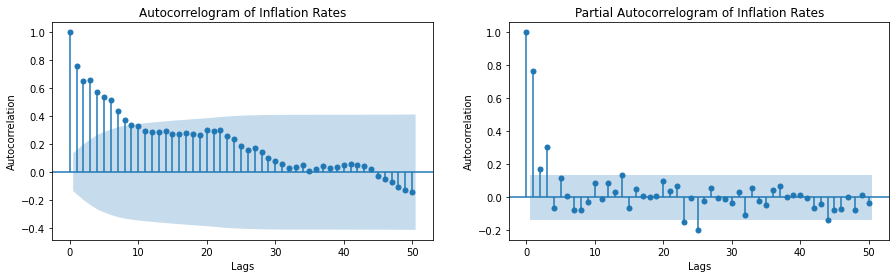

In [8]:
# Sets details of the plots
fig, axes = plt.subplots(1, 2, figsize=FIGSIZE)
for ax in axes:
    ax.set_ylabel("Autocorrelation")
    ax.set_xlabel("Lags")

# Plots the autocorrelogram of the inflation
fig = plot_acf(x=inf, ax=axes[0], lags=50, title="Autocorrelogram of Inflation Rates")

# Plots the partial autocorrelogram of the inflation
fig = plot_pacf(x=inf, ax=axes[1], lags=50, title="Partial Autocorrelogram of Inflation Rates")

# Shows the plots
plt.show()

As seen in class, the autocorrelogram shows the influence of a series at a time t−k in the past on the value of the series at time t, independently of the rest of the observations. The autocorrelogram (shown in the first plot) indicates that the autocorrelation tends to decrease over time as in an ARMA(p, q) process. We can also notice that the mentioned decrease is rather slow.

The partial autocorrelogram, on the other hand, performs the regression of the value present on all the values ​​passed up to time t−k. Thus, we identify the joint effects of different past periods. The partial autocorrelogram (shown in the second plot) oscillates around 0 as in a MA(0) type process. It is therefore characteristic of an autoregressive model. We also note that the first 3-4 coefficients are the only ones significant with a peak around 25 quarters characterizing cycles of 6 years.

There is, therefore, a non-negligible influence of the past for the determination of the present values ​​and one can suppose that the series is not stationary.

# Exercise 4

<br>

## Stationarity

We say that a process is stationary when its statistical characteristics don't change over time. We can distinguish two kinds of stationarity:

- **Weak Stationarity:** the mean of the considered random process is constant and its autocovariance function does not depend on the origin of time.
- **Strict Stationarity:** for any value of $N$, the characterization of order $N$ of the considered process is invariant with respect to a translation on the time axis.

<br>

## Ergodicity

Ergodicity is when the process that does not depend on its initial conditions. Therefore, its possible to calculate all of its statistical characteristics (mean, variance, etc.) from a single trajectory of the process, that is to say from from an observation of the process.

<br>

## Stationarity and Ergodicity

Ergodicity and stationarity are necessary conditions to apply the ergodicity theorem which guarantees that the mean of the values ​​of the observations tends towards the expectation of the series. In other words, we make sure that the series does not diverge from its expectations.

<br>

## Spurious Regression

Refers to the fact that two variables can be correlated without any causal link existing or being established between these variables. This results in a situation in which performing a regression on a non-stationary time series will generate erroneous results, suggesting a relationship between the variables when there is none.


# Exercise 5

In [9]:
# Generate an array of AR(p) fitted models for the inflation given lags between 1 and 10
ar_model_fits = [AutoReg(inf, lags=lag).fit() for lag in range(1, 11)]

# Selects the model with the lowest AIC
ar_model_fit = min(ar_model_fits, key=lambda x: x.aic)

# Prints the summary of the best AR(p) model obtained
print(ar_model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  211
Model:                     AutoReg(3)   Log Likelihood                -138.521
Method:               Conditional MLE   S.D. of innovations              0.471
Date:                Sun, 22 Nov 2020   AIC                             -1.458
Time:                        18:05:02   BIC                             -1.378
Sample:                             3   HQIC                            -1.425
                                  211                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1366      0.057      2.406      0.016       0.025       0.248
y.L1           0.5828      0.066      8.815      0.000       0.453       0.712
y.L2          -0.0184      0.077     -0.239      0.8

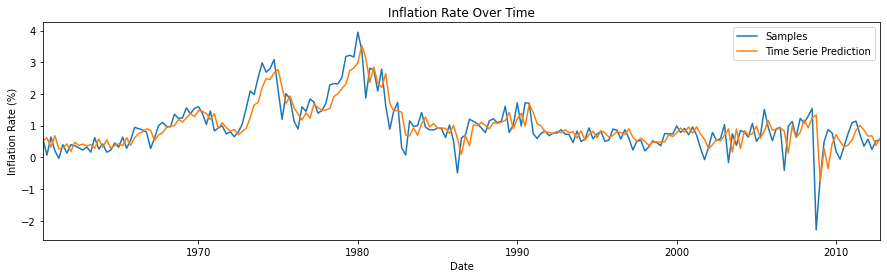

In [10]:
# Obtains the predictions of the time series
predictions = []
history = [x for x in inf]
for t in range(len(inf)):
	model_fit = AutoReg(history, lags=ar_model_fit.ar_lags).fit()
	predictions.append(model_fit.forecast()[0])
	history.append(inf[t])


# Compares the inflactions obtained by the time series and by the samples 
plt.figure(figsize=FIGSIZE)
plt.title("Inflation Rate Over Time")
plt.plot(df["DATE"][1:], inf, label="Samples")
plt.plot(df["DATE"][1:], predictions, label="Time Serie Prediction")
plt.xlim(np.min(df["DATE"][1:]), np.max(df["DATE"]))
plt.ylabel("Inflation Rate (%)")
plt.xlabel("Date")
plt.legend()
plt.show()

# Exercise 6

In [11]:
# Defines the dependent variable matrix y
y = df["Unemp"][1:].to_numpy()

# Defines the explanatory variables matrix X
X = np.column_stack((np.ones(y.shape), inf))

# Creates the Phillips OLS model giving y and X
phillips_model = sm.OLS(y, X).fit()

# Prints the summary of the Phillips model obtained
print(phillips_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.912
Time:                        18:05:03   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

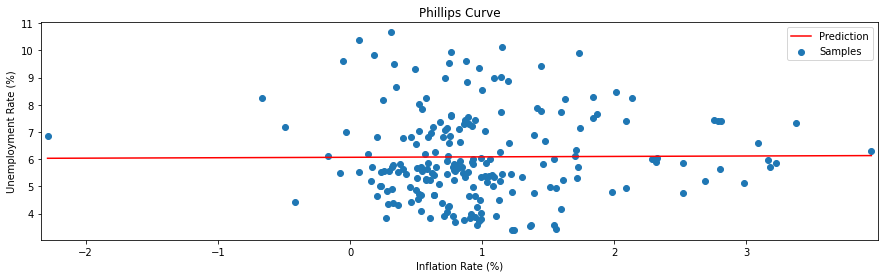

In [12]:
# Predicts the unemployement rate curve (using the Phillips model)
lin_inf = np.linspace(np.min(inf), np.max(inf), 1000)
X_samples = np.column_stack((np.ones(lin_inf.size), lin_inf))
unemp_pred = phillips_model.predict(X_samples)

# Plots the original samples and the Phillips OLS model predictions
plt.figure(figsize=FIGSIZE)
plt.title("Phillips Curve")
plt.scatter(inf, y, label="Samples")
plt.plot(lin_inf, unemp_pred, color="red", label="Prediction")
plt.xlim(np.min(inf)-0.05, np.max(inf)+0.05)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Inflation Rate (%)")
plt.legend()
plt.show()

# Exercise 7

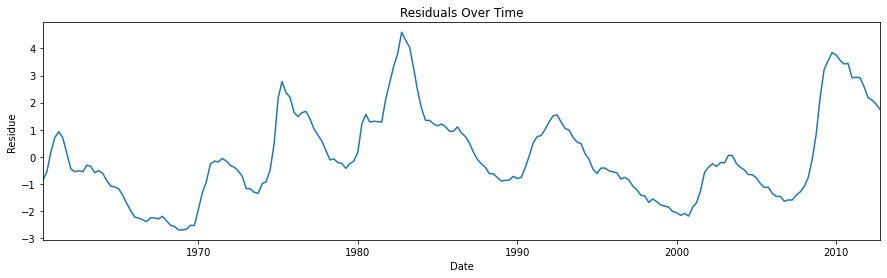

In [13]:
# Plots the residuals
plt.figure(figsize=FIGSIZE)
plt.title("Residuals Over Time")
plt.plot(df["DATE"][1:], phillips_model.resid)
plt.xlim(np.min(df["DATE"][1:]), np.max(df["DATE"]))
plt.ylabel("Residue")
plt.xlabel("Date")
plt.show()

To verify if the errors are autocorrelated we test the hypothesis $H_0$ that says that the errors are uncorrelated. We then molde the errors as an AR(1) process, which can be written as:

<br>

\begin{aligned}
    u_t = \rho \ u_{t-1} + e_t
\end{aligned}

<br>

Therefore, we can write the hypothesis $H_0$ as:

<br>

\begin{aligned}
    H_0: \rho = 0
\end{aligned}

<br>

Now, we fit the residuals of the Phillips model into the AR(1) process and see if the hypothesis checks out.

In [14]:
# Create the residuals AR(1) model
residuals_model = AutoReg(np.asarray(phillips_model.resid), lags=1).fit()

# Prints the summary of the obtained model
print(residuals_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  211
Model:                     AutoReg(1)   Log Likelihood                 -70.272
Method:               Conditional MLE   S.D. of innovations              0.338
Date:                Sun, 22 Nov 2020   AIC                             -2.140
Time:                        18:05:04   BIC                             -2.092
Sample:                             1   HQIC                            -2.121
                                  211                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0122      0.023      0.524      0.601      -0.034       0.058
y.L1           0.9800      0.014     67.714      0.000       0.952       1.008
                                    Roots           

On the summary printed above we can clearly see that the p-value of $\rho$ (shown in the column P>|z| and line y.L1) is almost zero. Therefore we reject the null hypothesis $H_0$ at 5% and conclude that the errors are autocorrelated.

# Exercise 8

We have the following relations:

<br>

\begin{aligned}
    \begin{cases}
        u_t & = & \rho \ u_{t-1} + e_t \\
        y_t & = & \beta_0 + \beta_1 X_t + u_t \\
        y_{t-1} & = & \beta_0 + \beta_1 X_{t-1} + u_{t-1}
    \end{cases}
\end{aligned}

<br>

Let $\tilde{y}_t$ and $\tilde{X}_t$ be:

<br>

\begin{aligned}
    \begin{cases}
        \tilde{y}_t & = & y_t − \rho y_{t−1} \\
        \tilde{X}_t & = & X_t − \rho X_{t−1}
    \end{cases}
\end{aligned}

<br>

In order to correct the autocorrelation, we consider a new model given by:

<br>

\begin{aligned}
        \tilde{y}_t = (1 - \rho) \beta_0 + \beta_1 X_t + e_t
\end{aligned}

In [15]:
# Obtains the intercept (rho) value for the residuals in the AR(1) model
rho = residuals_model.params[1]

# Obtains the dependent variable y_tilde
y_tilde = y[1:] - rho*y[:-1]

# Obtains the explanatory variable X_tilde
x_tilde = inf[1:] - rho*inf[:-1]
X_tilde = np.column_stack((np.ones(x_tilde.shape)-rho, x_tilde))

# Creates the Phillips OLS model giving y_tilde and X_tilde
phillips_residual_correction = sm.OLS(y_tilde, X_tilde).fit()

# Prints the summary of the model obtained
print(phillips_residual_correction.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.203
Date:                Sun, 22 Nov 2020   Prob (F-statistic):             0.0236
Time:                        18:05:04   Log-Likelihood:                -66.797
No. Observations:                 210   AIC:                             137.6
Df Residuals:                     208   BIC:                             144.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.7936      1.152      5.899      0.0

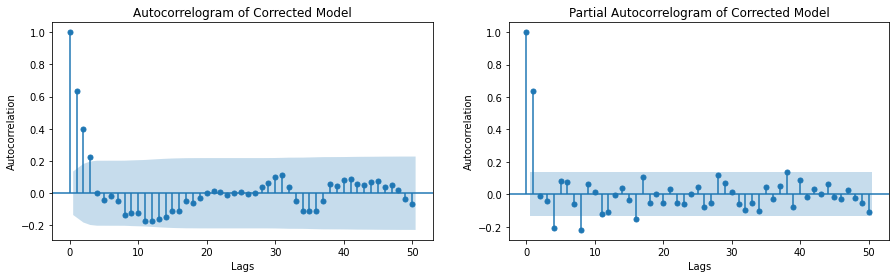

In [16]:
# Sets details of the plots
fig, axes = plt.subplots(1, 2, figsize=FIGSIZE)
for ax in axes:
    ax.set_ylabel("Autocorrelation")
    ax.set_xlabel("Lags")

# Plots the autocorrelogram of the inflation
fig = plot_acf(x=phillips_residual_correction.resid, ax=axes[0], lags=50, title="Autocorrelogram of Corrected Model")

# Plots the partial autocorrelogram of the inflation
fig = plot_pacf(x=phillips_residual_correction.resid, ax=axes[1], lags=50, title="Partial Autocorrelogram of Corrected Model")

# Shows the plots
plt.show()

We can see that the residual autocorrelation reduced after performing the correction.

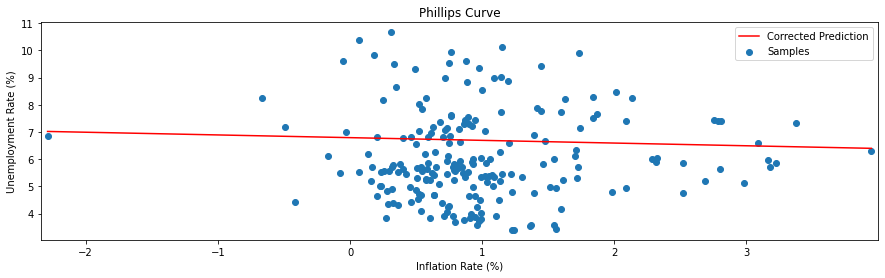

In [17]:
# Predicts the unemployement rate curve (using the corrected model)
unemp_pred = phillips_residual_correction.predict(X_samples)

# Plots the original samples and the Phillips OLS model predictions
plt.figure(figsize=FIGSIZE)
plt.title("Phillips Curve")
plt.scatter(inf, y, label="Samples")
plt.plot(lin_inf, unemp_pred, color="red", label="Corrected Prediction")
plt.xlim(np.min(inf)-0.05, np.max(inf)+0.05)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Inflation Rate (%)")
plt.legend()
plt.show()

# Exercise 9

To test the stability of the model we can perform the Chow test (which uses the F distribution). 

To be able to obtain the results of the Chow test, we have to consider, therefore, three different OLS models:

- The model without constraint (obtained above), which considers the whole dataset
- The first model with constraint, which considers the first half of the dataset
- The second model with constraint, which considers the second half of the dataset

As the null hypothesis we consider that the coefficients of the regressions in the two different sub-periods are equal (therefore, the model is stable).

In [18]:
# Obtains the SSR and the shape of the model without constraints
SSR0 = phillips_residual_correction.ssr
n, p = X_tilde.shape

# First sub-period model
model1_fit = sm.OLS(y_tilde[:len(y_tilde)//2], X_tilde[:len(y_tilde)//2]).fit()
SSR1 = model1_fit.ssr

# Second sub-period model
model2_fit = sm.OLS(y_tilde[len(y_tilde)//2:], X_tilde[len(y_tilde)//2:]).fit()
SSR2 = model2_fit.ssr

# Obtains the results of the Chow test
F = ((SSR0 - (SSR1 + SSR2))/(SSR1 + SSR2)) * (n-2*p)/p
p_value = sp.stats.f.sf(F, p, n-2*p)

# Prints the Chow test results
print(f"F-statistic: {F}, p-value: {p_value}")

F-statistic: 4.478457742098655, p-value: 0.012477491292531102


Since the p_value is below the 5% threshold we reject the null hypothesis of stability between the two periods for the separation that we carried out and, therefore, conclude that the model is not stable throughout time.

# Exercise 10

To draw conclusions we will estimate the Philips curve by removing current inflation from the explanatory variables but adding the lags of order 1, 2, 3 and 4 for inflation and unemployment.

At first we consider an OLS model only the 4 previous lags of unemployment (the constrained model).

In [19]:
# Datasets with delays of inflation
inf1 = inf[3:-1]
inf2 = inf[2:-2]
inf3 = inf[1:-3]
inf4 = inf[:-4]

# Datasets with delays of unemployement
unemp = df["Unemp"][1:]
unemp1 = unemp[3:-1]
unemp2 = unemp[2:-2]
unemp3 = unemp[1:-3]
unemp4 = unemp[:-4]

# Obtains the dependent variable
y = unemp[4:]

# Obtains the explanatory constrained variable
X_c = np.column_stack((np.ones(inf1.size), unemp1, unemp2, unemp3, unemp4))

# Creates the Phillips OLS model giving y and X_u
phillips_c_fit = sm.OLS(y, X_c).fit()

# Prints the summary of the model obtained
print(phillips_c_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2165.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          1.36e-164
Time:                        18:05:05   Log-Likelihood:                -2.9991
No. Observations:                 207   AIC:                             16.00
Df Residuals:                     202   BIC:                             32.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2157      0.071      3.036      0.0

Now, we consider the OLS model that contains the 4 previous lags of unemployment and inflation (unconstrained model).

In [20]:
# Obtains the explanatory unconstrained variable
X_u = np.column_stack((np.ones(inf1.size), unemp1, unemp2, unemp3, unemp4, inf1, inf2, inf3, inf4))

# Creates the Phillips OLS model giving y and X_u
phillips_u_fit = sm.OLS(y, X_u).fit()

# Prints the summary of the model obtained
print(phillips_u_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1145.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          2.80e-161
Time:                        18:05:05   Log-Likelihood:                 4.6497
No. Observations:                 207   AIC:                             8.701
Df Residuals:                     198   BIC:                             38.70
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.072      2.014      0.0

By the summary printed above, we can clearly see that in the unconstrained model all the coefficients related to the inflation (x5, x6, x7 and x8) pass the t test at 5%.

<br>

To do the Granger Causality Test, we test the null hypothesis given by:

<br>

\begin{aligned}
    H_0: \text{The unconstrained model does not give a significantly better fit than the constrained model}
\end{aligned}

<br>

To do so, we use the F distribution.

In [21]:
# Obtains the shape of both models
n, p_u = X_u.shape
n, p_c = X_c.shape

# Obtains the SSR in both models
SSR_u = phillips_u_fit.ssr
SSR_c = phillips_c_fit.ssr

# Obtains the results of the Granger test
F = ( (SSR_c-SSR_u)/(p_u-p_c) ) / (SSR_u/(n-p_u))
p_value = sp.stats.f.sf(F, p_u-p_c, n-p_u)

# Prints the Chow test results
print(f"F-statistic: {F}, p-value: {p_value}")

F-statistic: 3.7966991982053653, p-value: 0.00535195780793673


Since the p-value is higher than our threshold (5%) we reject the null hypothesis and, therefore, conclude that the unconstrained model (which considers both inflation and unemployement) gives a significantly better fit than the constrained model. In other words, by rejecting $H_0$ we conclude that inflation Granger causes unemployment.

# Exercise 11

To obtain the lag distribution for unemployement we plot the coefficients for each distributed lag of the unconstrained model:

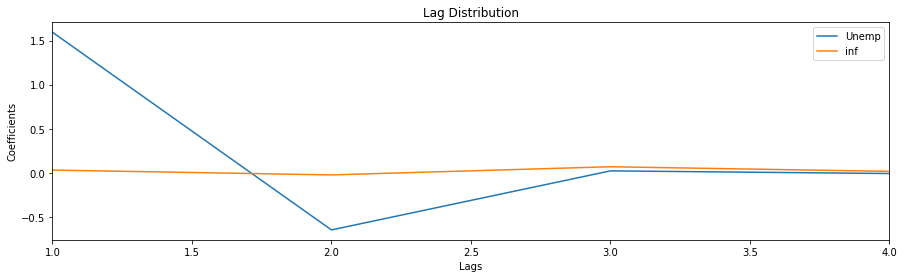

In [22]:
# Obtain model coefficients
u_unemp_coefs = phillips_u_fit.params[1:5]
u_inf_coefs = phillips_u_fit.params[5:]

# Obtain lags
lags = np.arange(1, 5)

# Plots the coefficients distributions
plt.figure(figsize=FIGSIZE)
plt.title("Lag Distribution")
plt.plot(lags, u_unemp_coefs, label="Unemp")
plt.plot(lags, u_inf_coefs, label="inf")
plt.ylabel("Coefficients")
plt.xlabel("Lags")
plt.xlim(np.min(lags), np.max(lags))
plt.legend()
plt.show()

The plot above shows us the influence that each delay in the inflaction or unemployment has on the current value of the unemployment. Therefore, after analysing it, we can conclude that the previous value of unemployments ($Unemp_{t-1}$) is much more significant in obtaining the current value unemployment than the others. We can also observe that the impact given by the inflation is not as significant as the previous value of unemployment.

We calculate the long-term impact run from inflation to unemployment by:

In [23]:
# Obtains the long-term impact run from inflation to unemployment
LTI = np.sum(u_inf_coefs)

# Prints the obtained result
print(f"LTI: {LTI}")

LTI: 0.09280567909911837


Therefore, given a 1% permanent increase in the previous inflaction we estimate a 9.28% increase in the unemployment.